In [2]:
import pandas as pd
import matplotlib.pyplot as plt # viz
import seaborn as sns # better viz
import numpy as np # numerical python

%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
# Loading Amazon UK product dataset
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [4]:
df.isna().sum() # NaNs

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [5]:
df.eq(" ").sum() # empty Spaces

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [6]:
df.duplicated().sum() #duplicates

0

In [7]:
df.head(3)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


In [8]:
num = df.select_dtypes(include="number") # defining numerical & Catagorical columns
cat = df.select_dtypes(exclude="number")

In [9]:
num. columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [10]:
cat.columns

Index(['asin', 'title', 'isBestSeller', 'category'], dtype='object')

In [11]:
### Part 1: Understanding Product Categories

## **Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

## ** 1. **Frequency Tables**:
#    - Generate a frequency table for the product `category`.
#    - Which are the top 5 most listed product categories?

In [12]:
category_frequency = df['category'].value_counts() # frequency table for the product `category
category_frequency

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [13]:
top5_cat = category_frequency.head(5)  # top 5 most listed product categories
top5_cat

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [14]:
## 2. **Visualizations**:

#    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart,
#        do it for a subset of top categories.*
#    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

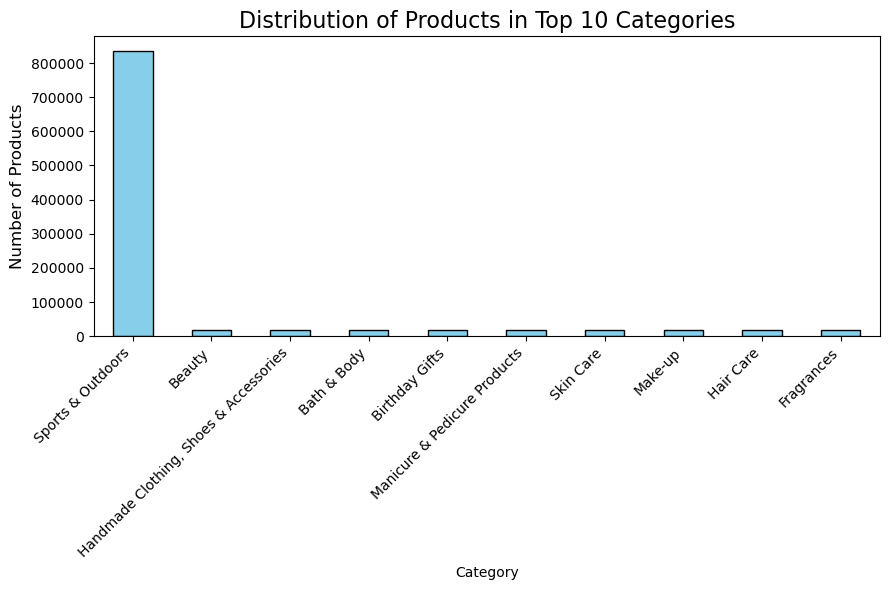

In [26]:
top_category_frequency = df_top_categories['category'].value_counts()

plt.figure(figsize=(9, 6))
top_category_frequency.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Products in Top 10 Categories', fontsize=16)
plt.xlabel('Category', fontsize=10)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show() # Display the distribution of products across different categories using a bar chart

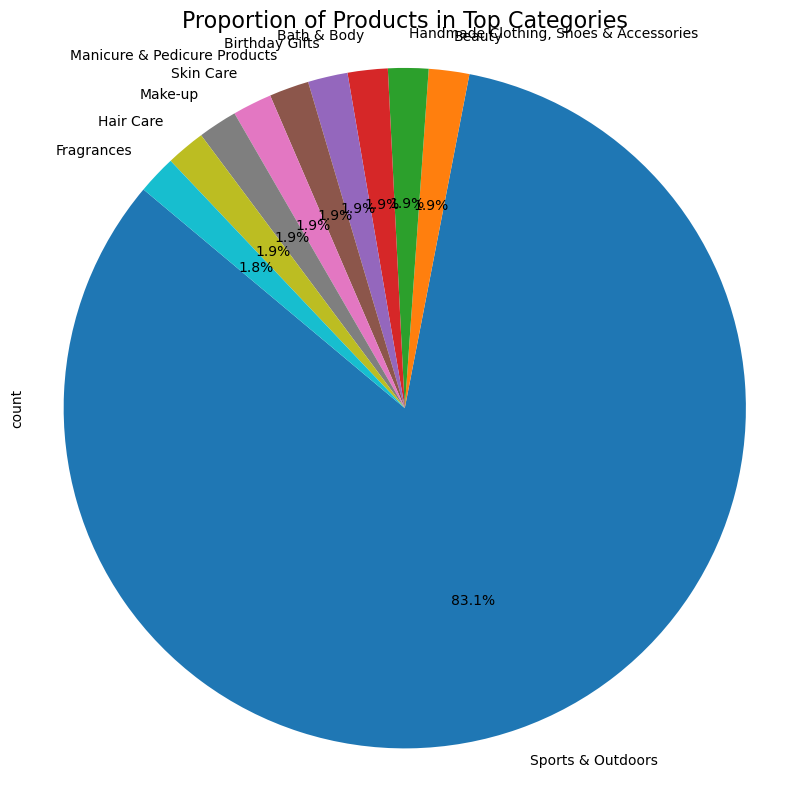

In [28]:
top_category_frequency = df_top_categories['category'].value_counts()

plt.figure(figsize=(8, 8))
top_category_frequency.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)

plt.title('Proportion of Products in Top Categories', fontsize=16)

plt.axis('equal')

plt.tight_layout()
plt.show() #visualize their proportions using a pie chart. 

In [ ]:
# Does any category dominate the listings?
# Yes, Sports & Outdoors has an 83.1% of the Proportion of Products


In [ ]:
### Part 2: Delving into Product Pricing

# **Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

# 1. **Measures of Centrality**:
#    - Calculate the mean, median, and mode for the `price` of products.
#    - What's the average price point of products listed? How does this compare with the most common price point (mode)?



In [34]:
mean_price = df['price'].mean() # Calculate mean
median_price = df['price'].median() # Calculate median
mode_price = df['price'].mode() # Calculate mode

print(f"Mean Price: {mean_price:.2f}")
print(f"Median Price: {median_price:.2f}")
print(f"Mode Price: {', '.join(map(str, mode_price))}")

Mean Price: 89.24
Median Price: 19.09
Mode Price: 9.99


In [50]:
av_rate = mean_price

if av_rate > mode_price[0]:
    print("The average price is higher than the mode.")
elif mean_price < mode_price[0]:
    print("The average price is lower than the mode.")
else:
    print("The average and mode prices are equal.")
print(f"The Average price is the same as the mean: {mean_price:.2f}")

The average price is higher than the mode.
The Average price is the same as the mean: 89.24


In [ ]:
# 2. **Measures of Dispersion**:
#    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
#    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [74]:
variance = df_cleaned['price'].var()
variance    # Variance, how far the data points are spread out from the mean

119445.48532256528

In [76]:
std_dev = df_cleaned['price'].std()
std_dev    # Standard Deviation, Square root of the variance, more dificult to understand 

345.60886175352226

In [64]:
price_range = df_cleaned['price'].max() - df_cleaned['price'].min()
price_range   # Range, Difference between the maximum and minimum prices

100000.0

In [82]:
q1 = df_cleaned['price'].quantile(0.25)
q3 = df_cleaned['price'].quantile(0.75)
iqr = q3 - q1      
iqr  # Interquartile Range  Measures the range to the median(50% )

36.0

In [ ]:
# 3. **Visualizations**:
#    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices.
#        *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
#    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers 
#        in product pricing. 

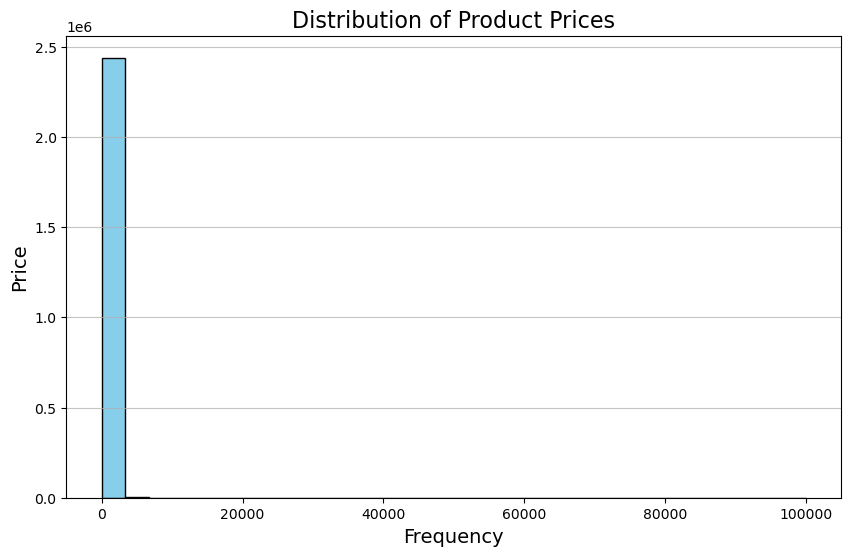

In [86]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df_cleaned = df.dropna(subset=['price'])

plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Prices', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()  # Histogram is very Hard to Read

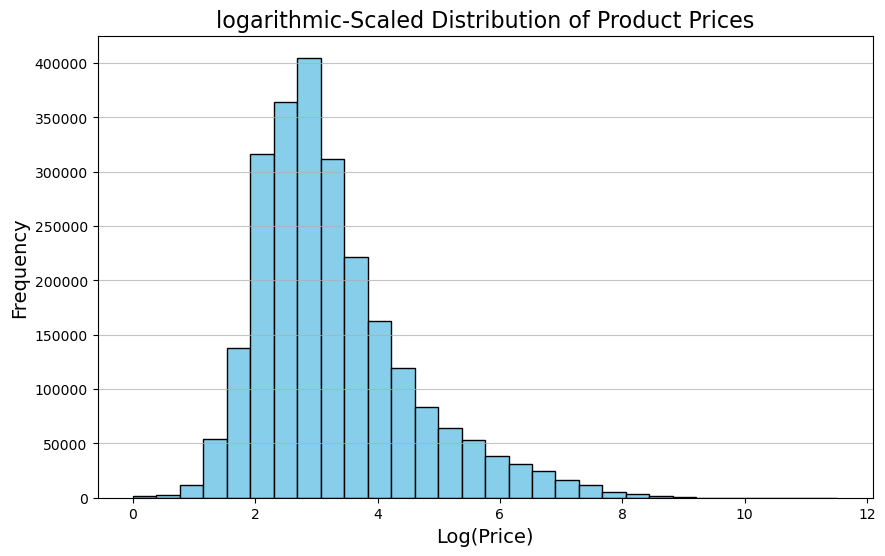

In [92]:
import numpy as np
df_cleaned['log_price'] = np.log1p(df_cleaned['price'])

plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['log_price'], bins=30, color='skyblue', edgecolor='black')
plt.title('logarithmic-Scaled Distribution of Product Prices', fontsize=16)
plt.xlabel('Log(Price)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()  

# Transform the price column using a logarithmic scale (log(price)) to spread out values more evenly.

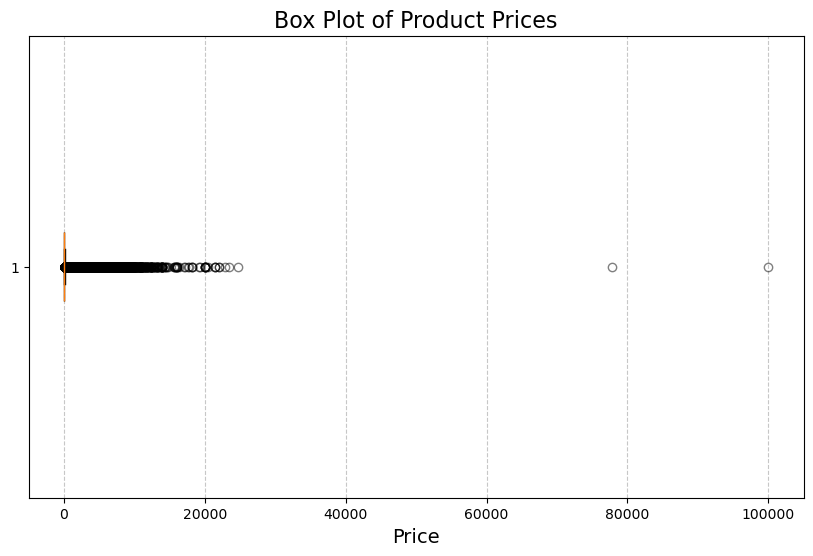

In [94]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df_cleaned = df.dropna(subset=['price'])

#  box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_cleaned['price'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='black'),
            flierprops=dict(marker='o', color='red', alpha=0.5))
plt.title('Box Plot of Product Prices', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()  # Box plot

In [ ]:
### Part 3: Unpacking Product Ratings

# **Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

#1. **Measures of Centrality**:
#    - Calculate the mean, median, and mode for the `rating` of products.
#    - How do customers generally rate products? Is there a common trend?



In [102]:
num.columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [104]:
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')
df_cleaned = df.dropna(subset=['stars'])

mean_stars = df_cleaned['stars'].mean()  # mean
median_stars = df_cleaned['stars'].median() # Median
mode_stars = df_cleaned['stars'].mode()[0]  # mode

print(f"Mean Rating: {mean_stars:.2f}")
print(f"Median Rating: {median_stars:.2f}")
print(f"Mode Rating: {mode_stars:.2f}")

Mean Rating: 2.15
Median Rating: 0.00
Mode Rating: 0.00


In [ ]:
#    - How do customers generally rate products? Is there a common trend?
#  The maiority of customers, dont give the rating, that´s why the median and mode are "0" 

In [ ]:
#2. **Measures of Dispersion**:
#    - Determine the variance, standard deviation, and interquartile range for product `rating`.
#    - Are the ratings consistent, or is there a wide variation in customer feedback?



In [116]:
variance_stars = df['stars'].var() 
variance_stars # Variance - Measures the average squared deviation from the mean

4.81743402976196

In [118]:
std_dev_stars = df['stars'].std()
std_dev_stars # Standard Variance, The square root of the variance

2.1948653785054697

In [124]:
q1 = df['stars'].quantile(0.25)
q3 = df['stars'].quantile(0.75)
iqr_stars = q3 - q1  # interquartile range - representing the range of the middle 50% (median) of the data.
iqr_stars

4.4

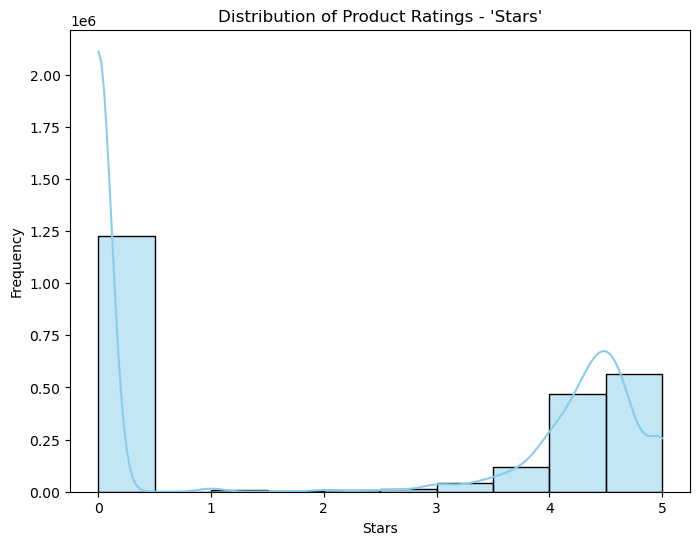

In [128]:
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['stars'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Product Ratings - 'Stars'")
plt.xlabel("Stars")
plt.ylabel("Frequency")
plt.show()

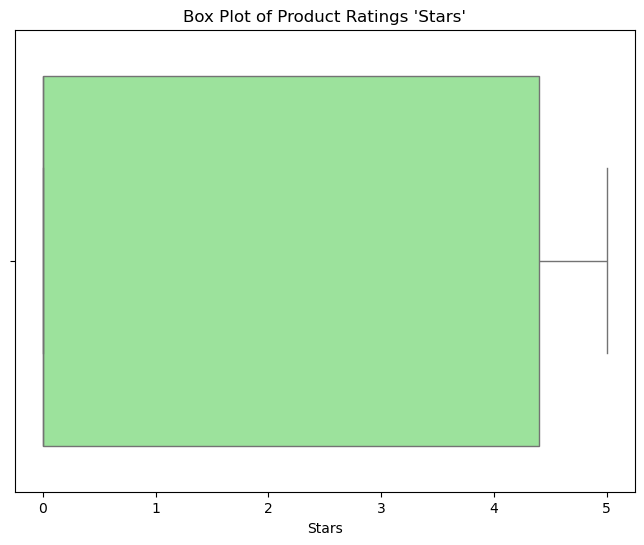

In [130]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['stars'], color='lightgreen')
plt.title("Box Plot of Product Ratings 'Stars'")
plt.xlabel("Stars")
plt.show()

In [ ]:
#3. **Shape of the Distribution**:
#    - Calculate the skewness and kurtosis for the `rating` column. 
#    - Are the ratings normally distributed, or do they lean towards higher or lower values?

In [134]:
import scipy.stats as stats

In [138]:
skewness = stats.skew(df_cleaned['stars'])
kurtosis = stats.kurtosis(df_cleaned['stars'])

print(f"Skewness of Rating 'Stars': {skewness:.2f}") 
print(f"Kurtosis of Ratings 'Stars': {kurtosis:.2f}")

Skewness of Rating 'Stars': 0.08
Kurtosis of Ratings 'Stars': -1.93


In [ ]:
# A skewness of 0.08 suggests that the distribution of ratings is slightly positively skewed, meaning there may be a slight tendency 
#       for higher rating
# A kurtosis of -1.93 indicates that the distribution has lighter tails than a normal distribution, suggesting fewer extreme outliers.

In [ ]:
#4. **Visualizations**:
#    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

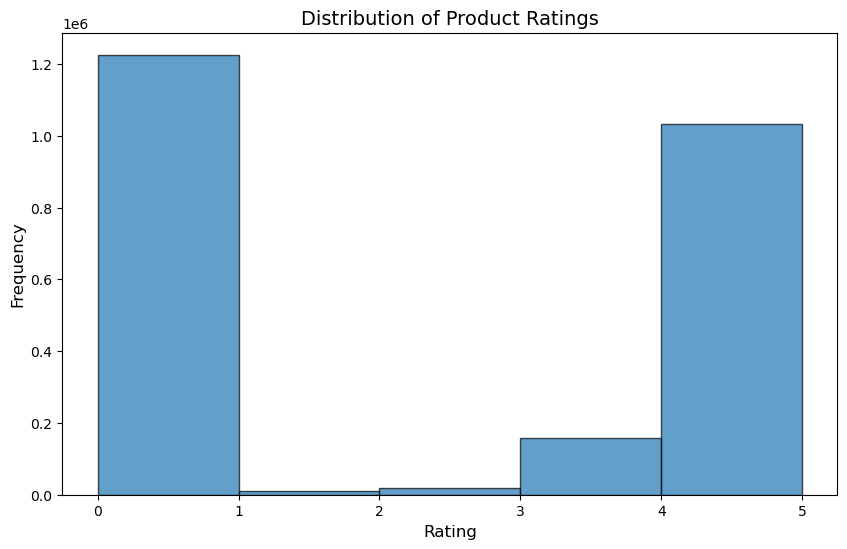

In [140]:
plt.figure(figsize=(10,6))
plt.hist(df_cleaned['stars'], bins=5, edgecolor='black', alpha=0.7)

plt.title('Distribution of Product Ratings', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

In [ ]:
# the most commum rating is "0" by default, if the customer dont rate the produt it´s "0" by default. 
# the second most commum is "5" the top of rantings the othes rantings has less or none expession